In [1]:
import sys
sys.path.append('..')
import sympy
from runge_kutta_method import RungeKuttaMethod
import math
from finite_difference_method import FiniteDifferenceMethod
from condition import Condition, TYPE_A, TYPE_B
from shooting_method import ShootingMethod
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y, z= sympy.symbols('x,y,z')
f_real = -sympy.tan(x)

# Метод стрельбы

In [3]:
func = {
        y: z,
        z: 2*(1+sympy.tan(x)**2)*y
}
sdata = {
    x:0,
    y:0,
    z:None,
}
section = [0, math.pi/6]
steps = [math.pi/(6*5),math.pi/(6*10)]
alpha,betta, y_0= (1,0,0)
delta, gamma, y_1 = (1,0,-math.sqrt(3)/3)
cond_a = Condition(alpha,betta,y_0, TYPE_A,y, z)
cond_b = Condition(delta, gamma,y_1, TYPE_B,y, z)


parametrs_method = {
    'method_solver': RungeKuttaMethod,
    'step':None,
    'eps': 0.0001,
    'section':section
}
parametrs_solve = {
    'func_dict':func,
    'sdata_dict':sdata,
    'ans_vars':(x,y),
    'cond_a':cond_a,
    'cond_b':cond_b,
    'dy': z,
    'y':y
}


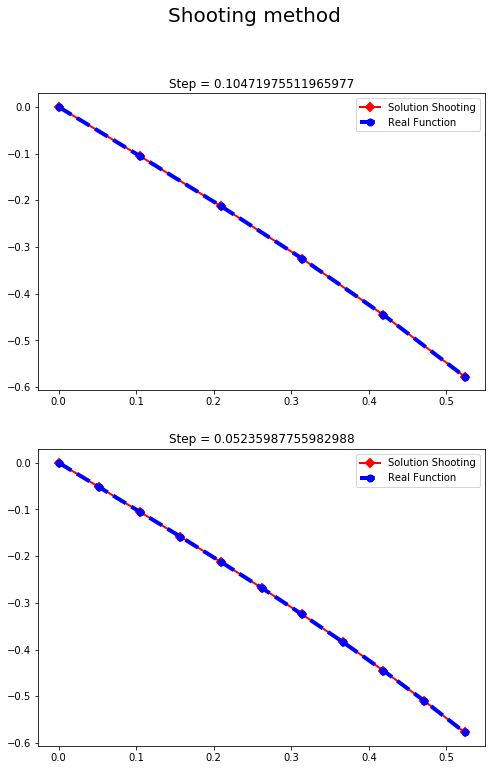

Precision Ronge-Runberga: 4.39147293092301E-7


In [4]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(8,12))
fig.suptitle('Shooting method',size = 20)
precisions = []
table_fucntions = []
for i,step in enumerate(steps):
    parametrs_method['step'] = step
    method = ShootingMethod(**parametrs_method)
    solution = method.solve(**parametrs_solve)
    f_real_values =np.array([f_real.subs(dict(zip(solution.varibals, [xi]))) for xi in solution.table[x].values]) 
    
    table_fucntions.append(solution)
    precisions.append(np.mean(ShootingMethod.precision(f_real,solution)))
    
    
    axs[i].plot(
        solution.table[x],
        solution.table[y],
        marker = 'D',
        markeredgewidth=2,
        color = 'red',
        linewidth= 2,
        label='Solution Shooting'
    )
    axs[i].plot(
        solution.table[x].values,
        f_real_values,
        marker = 'o',
        markeredgewidth=2,
        linestyle='--',
        color = 'blue',
        linewidth= 4,
        label="Real Function" 
    )
    axs[i].set_title(f'Step = {step}')
    axs[i].legend()

F_rung,x_vec,eps_rung = ShootingMethod.precision_runberg(f_real, table_fucntions[0],table_fucntions[1],2,2)
f_real_values =np.array([f_real.subs(dict(zip(solution.varibals, [xi]))) for xi in x_vec]) 
# axs[-1].plot(x_vec,F_rung,color = 'red',label='Solution Shooting Ronge - Runberga')
# axs[-1].plot(x_vec,f_real_values,color = 'blue', label="Real Function" )
# axs[-1].legend()

plt.show()

# for step,prec in zip(steps,precisions):
#     print(f'Precions mean step {step}: {prec}')
print(f'Precision Ronge-Runberga: {np.mean(eps_rung)}')

# Конечно-разностный метод решения краевой задачи

In [5]:
def p(x):
    return 0
def q(x):
    return -2*(1+math.tan(x)**2)
def f(x):
    return 0

[math.pi/(6*5),math.pi/(6*10)]
section = [0, math.pi/6]
alpha,betta, y_0= (1,0,0)
delta, gamma, y_1 = (1,0,-math.sqrt(3)/3)
cond_a = Condition(alpha,betta,y_0, TYPE_A,y, z)
cond_b = Condition(delta, gamma,y_1, TYPE_B,y, z)
parametrs_method = {
    'step':None,
    'section':section,
}
parametrs_solve ={
    'p':p,
    'f':f,
    'q':q,
    'cond_a':cond_a,
    'cond_b':cond_b,
    'x':x,
    'y':y
}


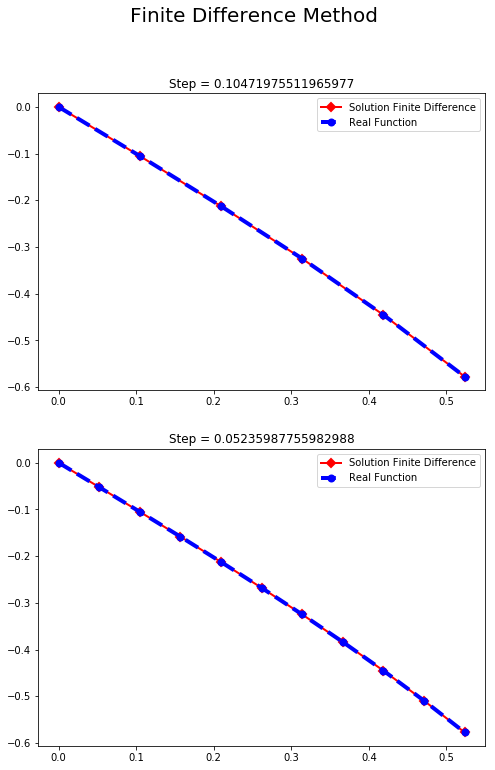

Precision Ronge-Runberga: 0.0000675944513203255


In [6]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(8,12))
fig.suptitle('Finite Difference Method',size =20)
precisions = []
table_fucntions = []
for i,step in enumerate(steps):
    parametrs_method['step'] = step
    method = FiniteDifferenceMethod(**parametrs_method)
    solution = method.solve(**parametrs_solve)
    f_real_values =np.array([f_real.subs(dict(zip(solution.varibals, [xi]))) for xi in solution.table[x].values]) 
    
    table_fucntions.append(solution)
    precisions.append(np.mean(FiniteDifferenceMethod.precision(f_real,solution)))
    
    
    axs[i].plot(
        solution.table[x],
        solution.table[y],
        marker = 'D',
        markeredgewidth=2,
        color = 'red',
        linewidth= 2,
        label='Solution Finite Difference'
    )
    axs[i].plot(
        solution.table[x].values,
        f_real_values,
        marker = 'o',
        markeredgewidth=2,
        linestyle='--',
        color = 'blue',
        linewidth= 4,
        label="Real Function"
    )
    axs[i].set_title(f'Step = {step}')
    axs[i].legend()

F_rung,x_vec,eps_rung = FiniteDifferenceMethod.precision_runberg(f_real, table_fucntions[0],table_fucntions[1],2,2)
f_real_values =np.array([f_real.subs(dict(zip(solution.varibals, [xi]))) for xi in x_vec]) 
# axs[-1].plot(x_vec,F_rung,color = 'red',label='Solution Finite Difference Ronge - Runberga')
# axs[-1].plot(x_vec,f_real_values,color = 'blue', label="Real Function" )
# axs[-1].legend()

plt.show()

# for step,prec in zip(steps,precisions):
#     print(f'Precions mean step {step}: {prec}')
print(f'Precision Ronge-Runberga: {np.mean(eps_rung)}')